In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('laptops_10.csv', encoding = 'latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите количество памяти с помощью matplotlib'
Будем строить гистограмму  

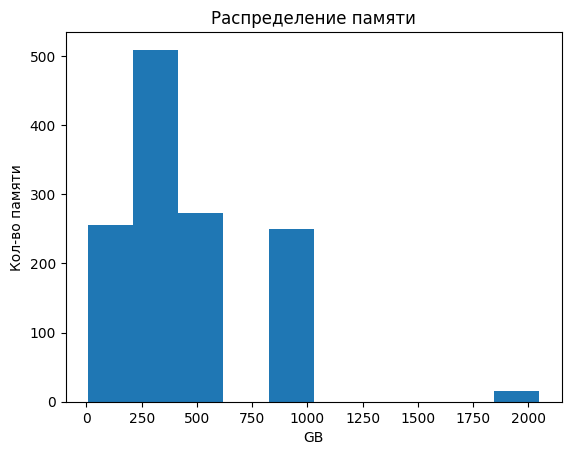

In [3]:
plt.hist(df['Memory_Amount'])
plt.xlabel('GB')                    # называем оси
plt.ylabel('Кол-во памяти')
plt.title('Распределение памяти');   # название гистограммы

1.2 Изучите стоимость ноутбуков с помощью matplotlib

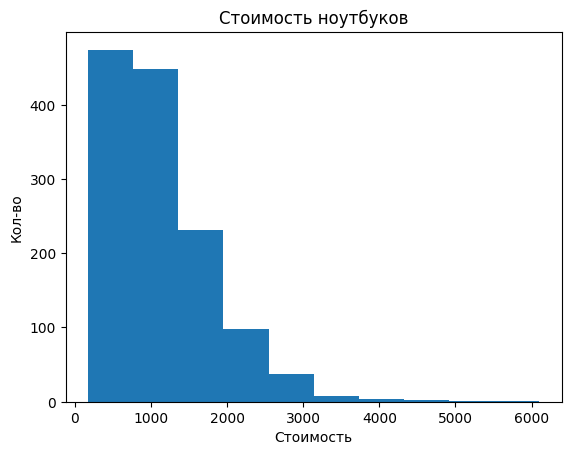

In [5]:
plt.hist(df['Price_euros'])
plt.xlabel('Стоимость')
plt.ylabel('Кол-во')
plt.title('Стоимость ноутбуков');

1.3 Изучите вес ноутбуков с помощью matplotlib

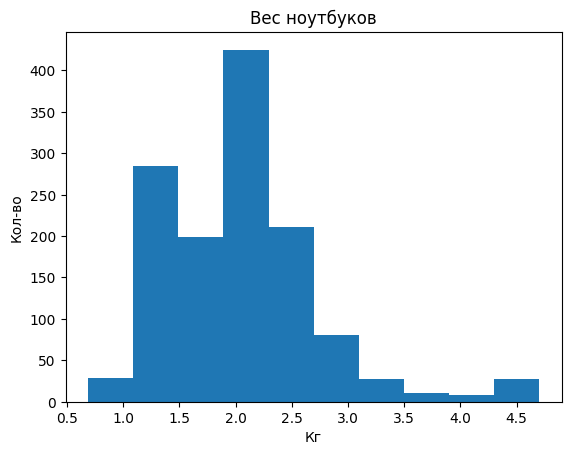

In [6]:
plt.hist(df['Weight'])
plt.xlabel('Кг')
plt.ylabel('Кол-во')
plt.title('Вес ноутбуков');

2.1 Изучите распределение типов носителя

In [9]:
data = df['Memory_Type'].value_counts()        # считаем кол-во
data        # первый столбец - индексы, второй - строки

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

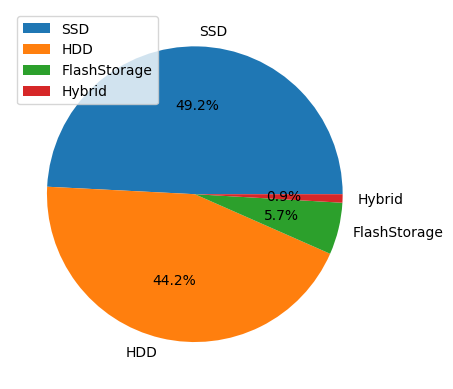

In [10]:
plt.pie(data.values, labels= data.index, autopct='%1.1f%%');        # передаем значения, затем подписи, 1 знак после запятой 
plt.legend(data.index);

2.2 Изучите распределение компаний производителей

In [1]:
data = df['Company'].value_counts()
plt.figure(figsize=(8, 6))  
plt.bar(data.index, data.values);        # передаем значения, затем подписи, 1 знак после запятой 
plt.xticks(rotation = 50);              # поворот надписей под углом

NameError: name 'df' is not defined

2.3 Изучите распределение операционной системы

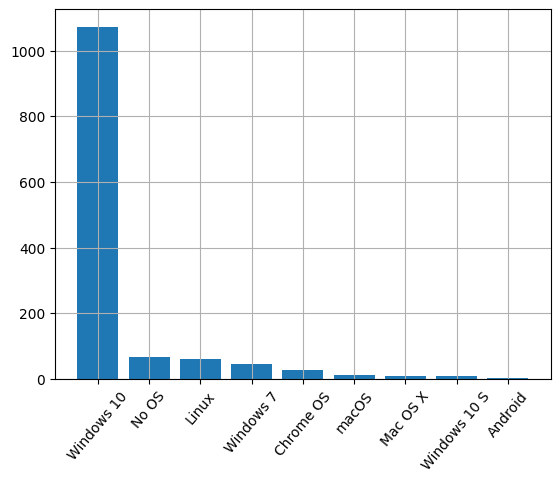

In [16]:
data = df['OpSys'].value_counts()  
plt.bar(data.index, data.values);      
plt.xticks(rotation = 50);
plt.grid()

2.4 Изучите распределение компаний производителей CPU

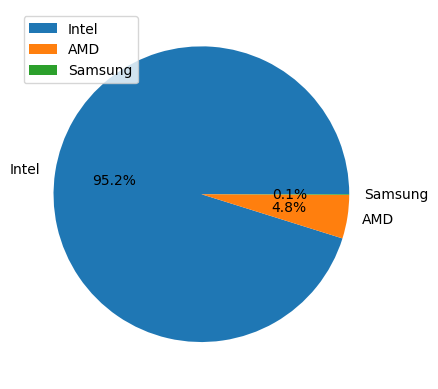

In [18]:
data = df['Cpu_Company'].value_counts()  
plt.pie(data.values, labels= data.index, autopct='%1.1f%%');
plt.legend(data.index);

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

In [30]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()                           # сбросим индексы reset.index
data


Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


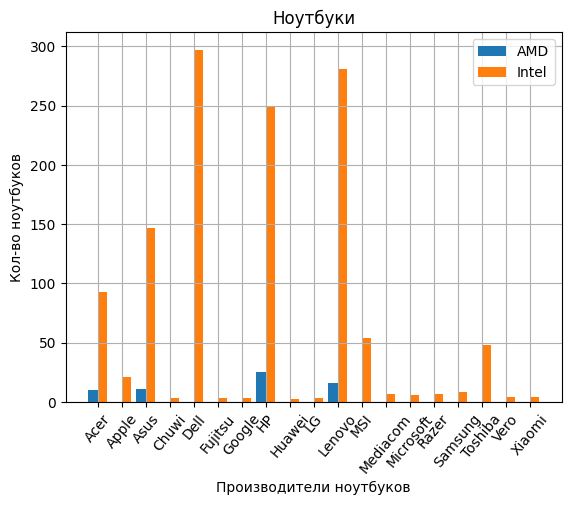

In [36]:
import numpy as np
n_ticks = np.arange(len(data))       # создаем массив кол-во такое же как поле Company
plt.bar(n_ticks - 0.2, data['AMD'], width=0.4)
plt.bar(n_ticks + 0.2, data['Intel'], width=0.4)

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(n_ticks, data['Company'], rotation=50);

3.2 Постройте график в относительных величинах

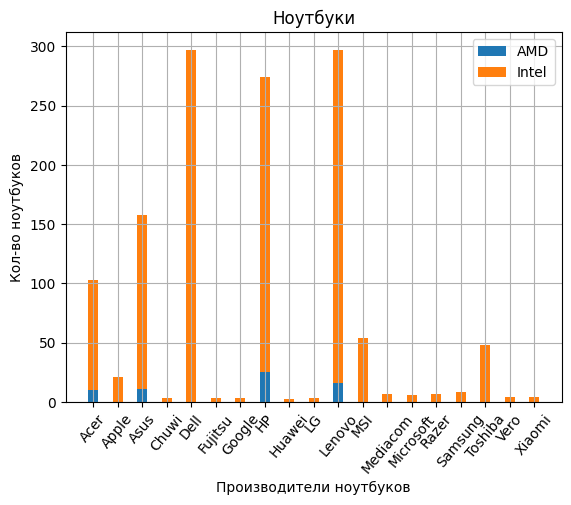

In [39]:
import numpy as np
plt.bar(data['Company'], data['AMD'], width=0.4)
plt.bar(data['Company'], data['Intel'], width=0.4, bottom=data['AMD'])

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(rotation=50);

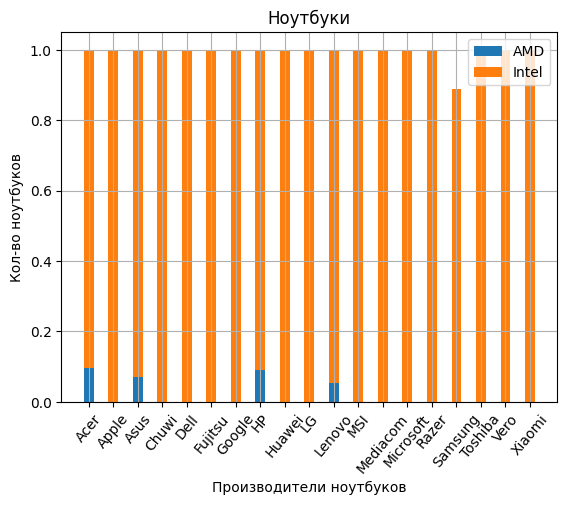

In [40]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()

plt.bar(data['Company'], data['AMD'], width=0.4)
plt.bar(data['Company'], data['Intel'], width=0.4, bottom=data['AMD'])

plt.legend(['AMD', 'Intel'])
plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во ноутбуков')
plt.grid()
plt.xticks(rotation=50);                           

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

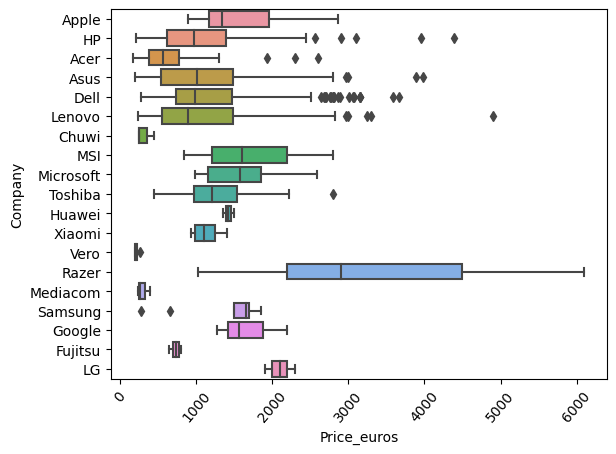

In [44]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Company'])       # showfliers=False - убрать выбросы 
plt.xticks(rotation=50);

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

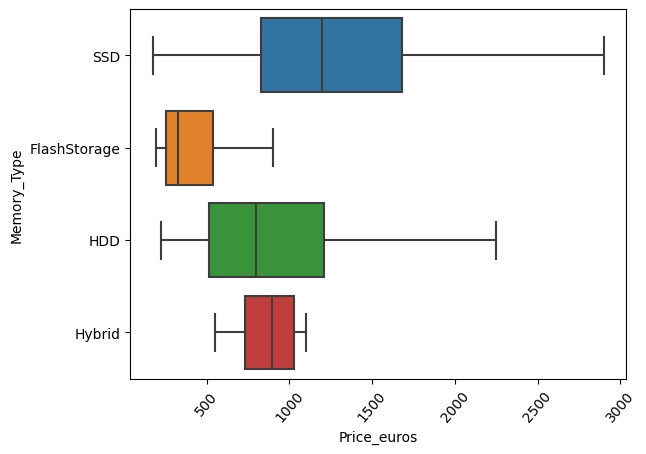

In [45]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], showfliers=False)
plt.xticks(rotation=50);

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

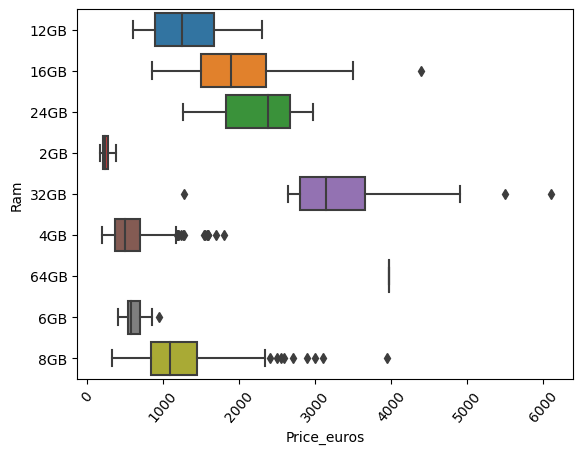

In [50]:
data = df.sort_values('Ram')
sns.boxplot(x=data['Price_euros'], y=data['Ram'])
plt.xticks(rotation=50);

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

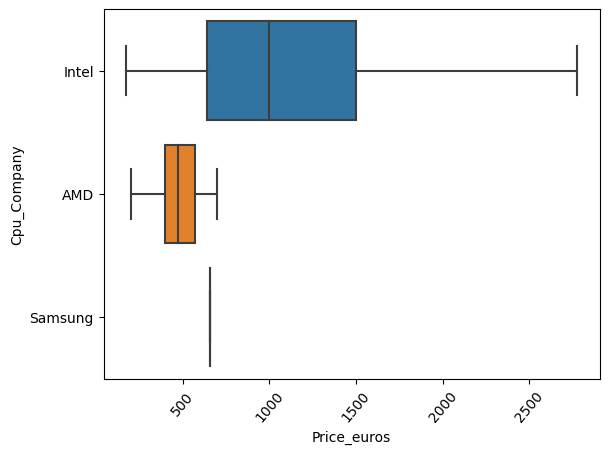

In [49]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False)
plt.xticks(rotation=50);

Постройте матрицу корреляций для таблицы

In [51]:
corr_matrix = df.corr()                             # готовим данные для графика
corr_matrix = np.round(corr_matrix, 1)
corr_matrix

C:\Users\Makc\AppData\Local\Temp\ipykernel_2636\4071305822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


<Axes: >

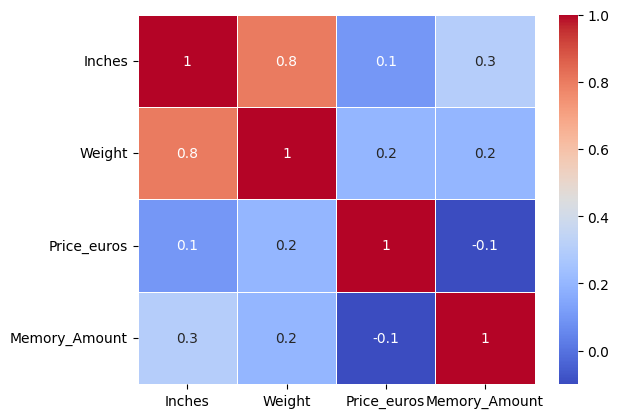

In [54]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')